#Lab 1



## Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models. Use the Perceptron() from sklearn.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Generate a synthetic linearly separable binary dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

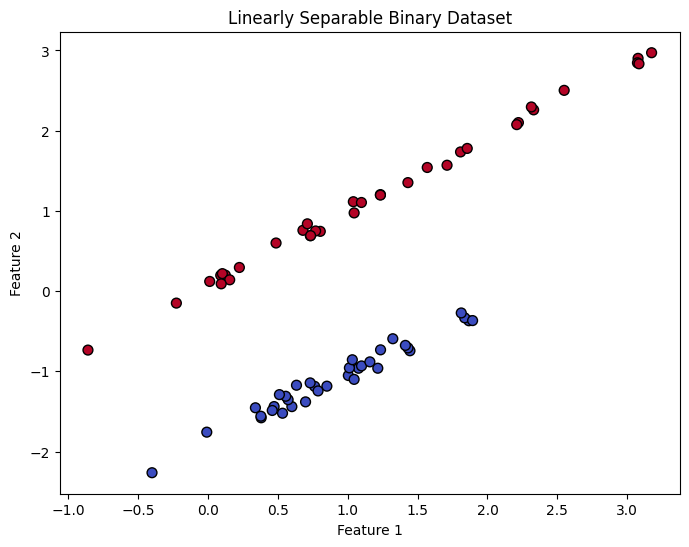

In [ ]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Linearly Separable Binary Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Create and train the perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 100.00%


In [ ]:
# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
# Predict on the grid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

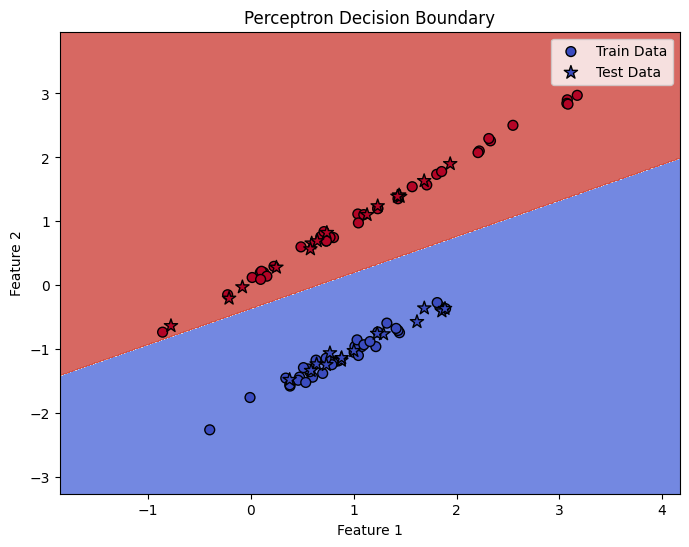

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', s=50, label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', s=100, marker='*', label="Test Data")
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Lab 2

## Identify the problem with single unit Perceptron. Classify using Or-, And- and Xor-ed data and analyze the result.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
# Define OR, AND, and XOR datasets
or_data = {
    "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "y": np.array([0, 1, 1, 1])
}

and_data = {
    "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "y": np.array([0, 0, 0, 1])
}

xor_data = {
    "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "y": np.array([0, 1, 1, 0])
}

In [ ]:
# Function to train and visualize perceptron performance
def analyze_perceptron(data, title):
    X, y = data["X"], data["y"]

    # Train perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X, y)

    # Predict and calculate accuracy
    y_pred = perceptron.predict(X)
    accuracy = accuracy_score(y, y_pred)

    print(f"{title} Classification Accuracy: {accuracy * 100:.2f}%")

    # Visualize decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
    plt.title(f"{title} with Perceptron")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

OR Gate Classification Accuracy: 100.00%


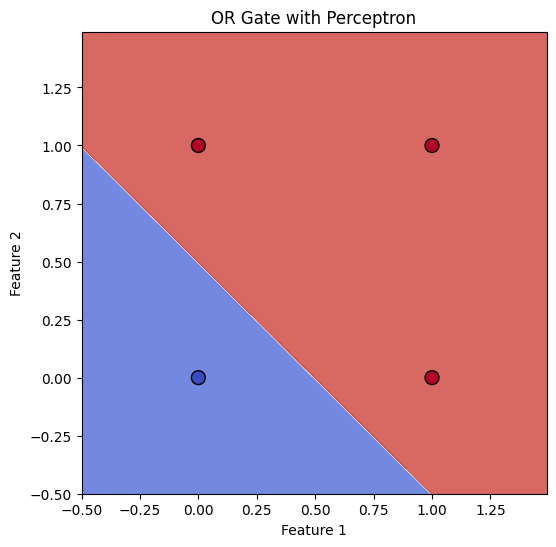

AND Gate Classification Accuracy: 100.00%


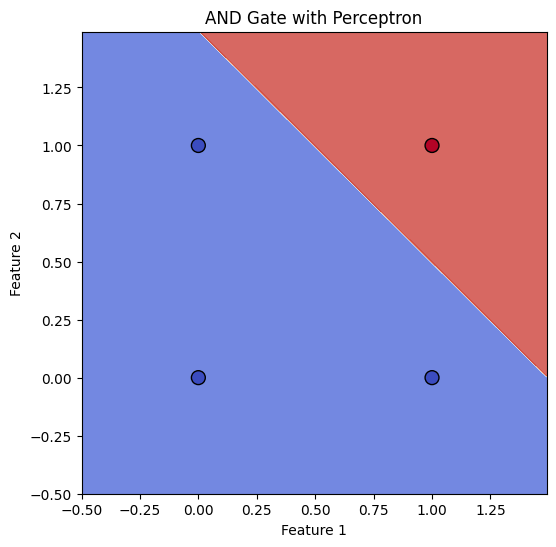

XOR Gate Classification Accuracy: 50.00%


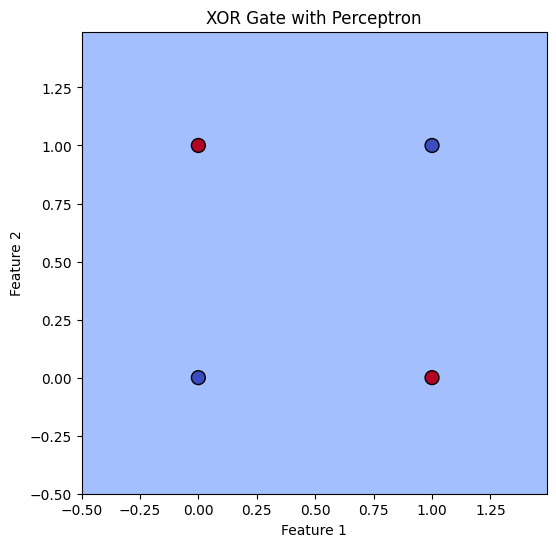

In [ ]:
# Analyze OR, AND, and XOR datasets
analyze_perceptron(or_data, "OR Gate")
analyze_perceptron(and_data, "AND Gate")
analyze_perceptron(xor_data, "XOR Gate")

# Discussion:
# The perceptron performs well on OR and AND datasets because they are linearly separable.
# However, it fails on the XOR dataset because XOR is not linearly separable.

# Lab 3

## Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets. Vary the activation functions used and compare the results.

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Generate a synthetic dataset (make_moons for non-linear classification)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Function to build and train an ANN with a specified activation function
def train_model(activation_function):
    # Define a sequential ANN model
    model = Sequential([
        Dense(10, activation=activation_function, input_shape=(2,)),  # Hidden layer with 10 neurons
        Dense(5, activation=activation_function),  # Another hidden layer
        Dense(1, activation='sigmoid')  # Output layer (Binary Classification)
    ])

    # Compile the model with backpropagation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Activation: {activation_function} | Test Accuracy: {accuracy:.4f}")

    return history


Training model with sigmoid activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid | Test Accuracy: 0.8550

Training model with relu activation...
Activation: relu | Test Accuracy: 0.9450

Training model with tanh activation...
Activation: tanh | Test Accuracy: 0.8650


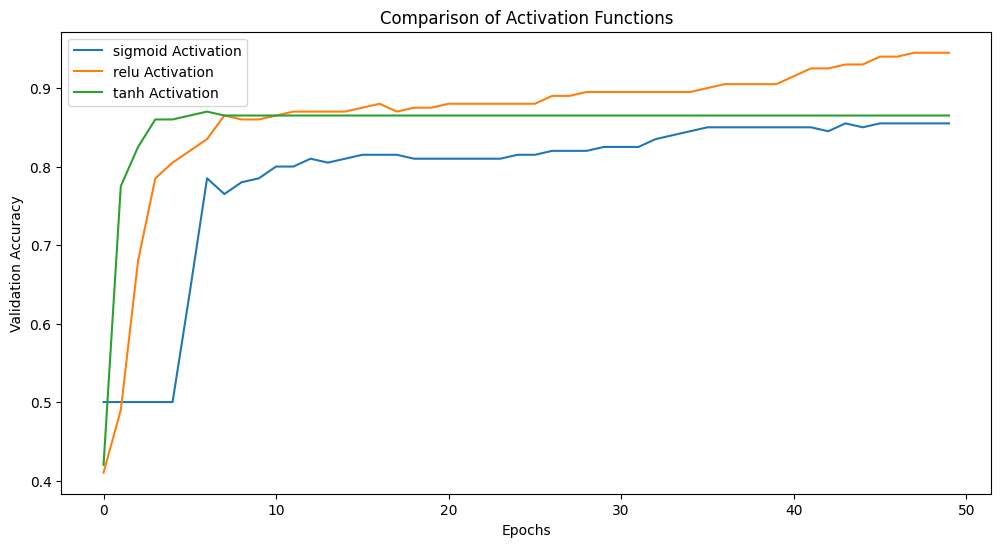

In [ ]:
# Train and compare models with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
histories = {}

plt.figure(figsize=(12, 6))

for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    histories[activation] = train_model(activation)

    # Plot accuracy over epochs
    plt.plot(histories[activation].history['val_accuracy'], label=f"{activation} Activation")

# Graph labels
plt.title('Comparison of Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Lab 4

## Build a Deep Feed Forward ANN by implementing the Backpropagation algorithm and test the same using appropriate data sets. Use the number of hidden layers >=4.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Generate synthetic dataset (customer purchase prediction)
num_samples = 1000
age = np.random.randint(18, 65, num_samples)
income = np.random.randint(20000, 120000, num_samples)
website_activity = np.random.uniform(0, 1, num_samples) * 100
email_engagement = np.random.uniform(0, 1, num_samples) * 100

In [ ]:
# Generate target labels (Purchased = 1, Not Purchased = 0)
purchase = (income > 50000) & (website_activity > 40) & (email_engagement > 30)
purchase = purchase.astype(int)

In [ ]:
# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Website_Activity_Score': website_activity.round(2),
    'Email_Engagement_Score': email_engagement.round(2),
    'Purchased': purchase
})

In [ ]:
# Save dataset to CSV file
df.to_csv("customer_purchase_data.csv", index=False)

# Load dataset
df = pd.read_csv("customer_purchase_data.csv")

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Purchased']).values
y = df['Purchased'].values

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Function to build and train a Deep ANN model
def build_and_train_ann(activation_function):
    # Define a deep feedforward neural network
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(X_train.shape[1],)),  # Input layer
        Dense(128, activation=activation_function),  # Hidden layer 1
        Dense(64, activation=activation_function),  # Hidden layer 2
        Dense(32, activation=activation_function),  # Hidden layer 3
        Dense(16, activation=activation_function),  # Hidden layer 4
        Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])

    # Compile the model using Backpropagation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate model performance
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Activation: {activation_function} | Test Accuracy: {accuracy:.4f}")

    return history

In [ ]:
# Define activation functions for comparison
activations = ['relu', 'tanh', 'sigmoid']
histories = {}

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>


Training model with relu activation...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8033 - loss: 0.6120 - val_accuracy: 0.9100 - val_loss: 0.3255
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8948 - loss: 0.3021 - val_accuracy: 0.9300 - val_loss: 0.1983
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9183 - loss: 0.2091 - val_accuracy: 0.9450 - val_loss: 0.1641
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9598 - loss: 0.1285 - val_accuracy: 0.9250 - val_loss: 0.1715
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9400 - loss: 0.1491 - val_accuracy: 0.9650 - val_loss: 0.1140
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9649 - loss: 0.0984 - val_accuracy: 0.9750 - val_loss: 0.0989
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9516 - loss: 0.1044 - val_accuracy: 0.9750 - val_loss: 0.0937
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9729 - loss: 0.0644 - val_accuracy: 0.9650 - val_loss: 0.1047
Ep

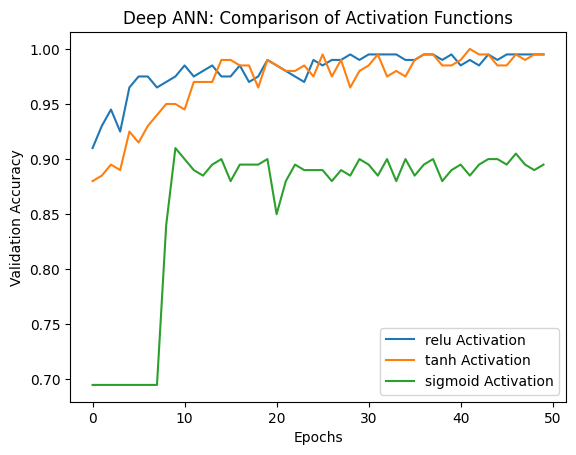

In [ ]:
# Train and compare different activation functions
for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    histories[activation] = build_and_train_ann(activation)

    # Plot accuracy over epochs
    plt.plot(histories[activation].history['val_accuracy'], label=f"{activation} Activation")

# Graph labels
plt.title('Deep ANN: Comparison of Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Lab 5

## Design and implement a CNN model (with 2 layers of convolutions) to classify multi category image datasets. Record the accuracy corresponding to the number of epochs. Use the MNIST, CIFAR-10 datasets.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

# Reshape MNIST images to (28,28,1) for CNN input
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1)

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Define CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Train and evaluate on MNIST
epochs = 10
mnist_model = create_cnn_model((28, 28, 1), 10)
history_mnist = mnist_model.fit(x_train_mnist, y_train_mnist, epochs=epochs, validation_data=(x_test_mnist, y_test_mnist))

# Train and evaluate on CIFAR-10
cifar_model = create_cnn_model((32, 32, 3), 10)
history_cifar = cifar_model.fit(x_train_cifar, y_train_cifar, epochs=epochs, validation_data=(x_test_cifar, y_test_cifar))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9058 - loss: 0.3168 - val_accuracy: 0.9854 - val_loss: 0.0448
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 30ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9852 - val_loss: 0.0461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 0.9868 - val_loss: 0.0359
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9926 - loss: 0.0224 - val_accuracy: 0.9894 - val_loss: 0.0292
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9896 - val_loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9911 - val_loss: 0.0304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9910 - val_loss: 0.0305
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9973 -

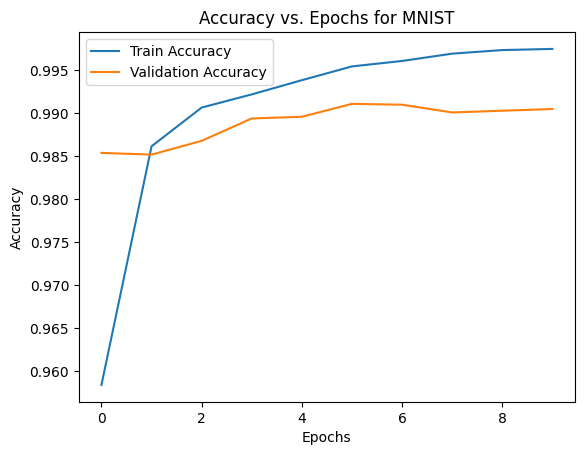

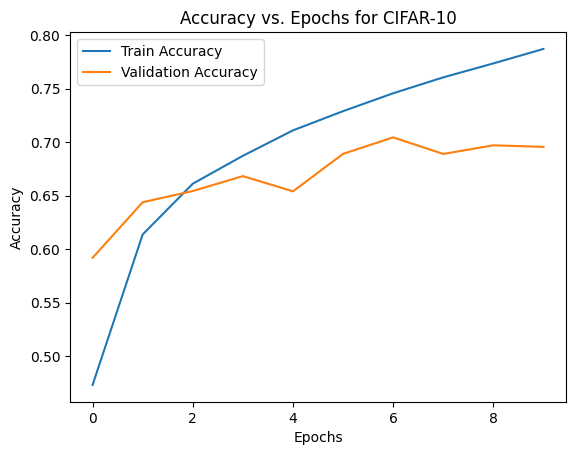

In [ ]:
# Plot accuracy vs. epochs
def plot_accuracy(history, dataset_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Epochs for {dataset_name}')
    plt.legend()
    plt.show()

plot_accuracy(history_mnist, "MNIST")
plot_accuracy(history_cifar, "CIFAR-10")

# Lab 6

## Design and implement a CNN model (with 2+ layers of convolutions) to classify multi category image datasets. Use the concept of padding and Batch Normalization while designing the CNN model. Record the accuracy corresponding to the number of epochs. Use the Fashion MNIST/MNIST/CIFAR10 datasets.

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist  # Use MNIST or CIFAR-10 as needed
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load Fashion MNIST dataset (Use mnist/cifar10 as needed)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape dataset for CNN input (28x28 grayscale images with 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build CNN model with padding and batch normalization
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(10, activation='softmax')  # Output layer for 10 categories
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create CNN model
cnn_model = build_cnn_model()

# Train CNN model and record accuracy over epochs
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate model performance
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 189s 184ms/step - accuracy: 0.7959 - loss: 0.5991 - val_accuracy: 0.8507 - val_loss: 0.4092
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 168s 149ms/step - accuracy: 0.8934 - loss: 0.3013 - val_accuracy: 0.8941 - val_loss: 0.2882
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 149ms/step - accuracy: 0.9105 - loss: 0.2509 - val_accuracy: 0.9039 - val_loss: 0.2617
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 149s 156ms/step - accuracy: 0.9248 - loss: 0.2137 - val_accuracy: 0.9088 - val_loss: 0.2505
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 196s 150ms/step - accuracy: 0.9300 - loss: 0.1969 - val_accuracy: 0.9045 - val_loss: 0.2849
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 150ms/step - accuracy: 0.9360 - loss: 0.1791 - val_accuracy: 0.9140 - val_loss: 0.2424
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 152ms/step - accuracy: 0.9434 - loss: 0.1560 - val_accuracy: 0.9155 - val_loss: 0.2405
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 199s 148ms/step - accuracy: 0.9500 -

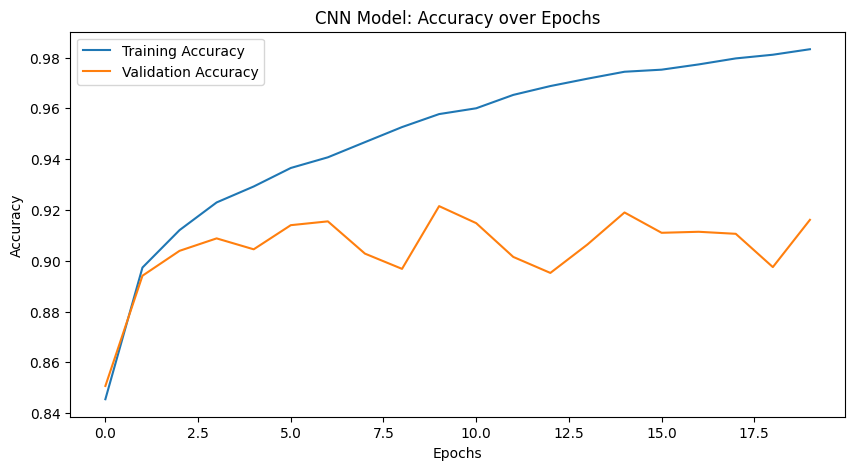

In [ ]:
# Plot Accuracy vs. Epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model: Accuracy over Epochs')
plt.legend()
plt.show()

# Lab 7

## Use the concept of Data Augmentation to increase the data size from a single image.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
# Create a directory to save augmented images
os.makedirs("augmented_images", exist_ok=True)

# Upload an image manually in Google Colab
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load the uploaded image
image = load_img(image_path)  # Load image as PIL object
image_array = img_to_array(image)  # Convert to array
image_array = np.expand_dims(image_array, axis=0)  # Expand dimensions to match input format

Saving WhatsApp Image 2025-03-17 at 10.30.08 PM.jpeg to WhatsApp Image 2025-03-17 at 10.30.08 PM.jpeg


In [ ]:
# Define Data Augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

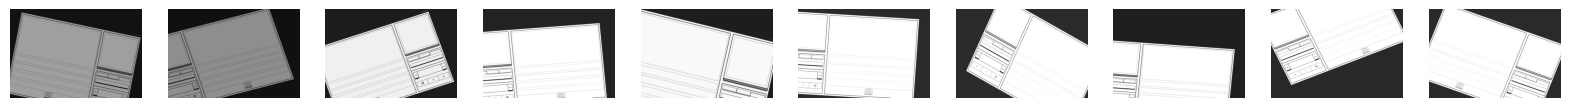

In [ ]:
# Generate and visualize augmented images
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

# Generate images
i = 0
for batch in datagen.flow(image_array, batch_size=1, save_to_dir="augmented_images", save_prefix="aug", save_format="jpg"):
    ax = axes[i]
    ax.imshow(batch[0].astype('uint8'))
    ax.axis('off')
    i += 1
    if i == num_images:
        break  # Stop after generating required images

plt.show()

# Lab 8

## Implement RNN for sentiment analysis on movie reviews.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load and Preprocess Data
vocab_size = 10000  # Number of words to consider as features
max_length = 200  # Maximum length of a review

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
train_data = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Step 2: Build RNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Step 3: Train Model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.5148 - loss: 0.6944 - val_accuracy: 0.5152 - val_loss: 0.6940
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 86ms/step - accuracy: 0.6110 - loss: 0.6507 - val_accuracy: 0.5015 - val_loss: 0.7148
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.6939 - loss: 0.5175 - val_accuracy: 0.5318 - val_loss: 0.7793
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.7452 - loss: 0.4013 - val_accuracy: 0.5348 - val_loss: 0.8704
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - accuracy: 0.7606 - loss: 0.3657 - val_accuracy: 0.5214 - val_loss: 0.9674


In [ ]:
# Step 4: Evaluate Model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5256 - loss: 0.9658
Test Accuracy: 0.5214


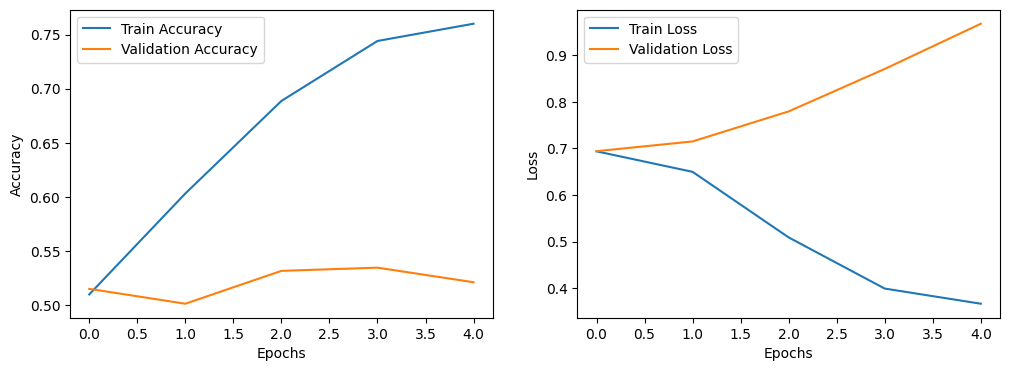

In [ ]:
# Step 5: Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lab 9

## Implement Bidirectional LSTM for sentiment analysis on movie reviews.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load and Preprocess Data
vocab_size = 10000  # Number of words to consider as features
max_length = 200  # Maximum length of a review

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
train_data = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Step 2: Build Bidirectional LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Train Model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 155s 383ms/step - accuracy: 0.6591 - loss: 0.5986 - val_accuracy: 0.7810 - val_loss: 0.4814
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 384ms/step - accuracy: 0.8340 - loss: 0.3920 - val_accuracy: 0.8450 - val_loss: 0.3752
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 383ms/step - accuracy: 0.9104 - loss: 0.2459 - val_accuracy: 0.8458 - val_loss: 0.3689
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 383ms/step - accuracy: 0.9306 - loss: 0.1969 - val_accuracy: 0.8397 - val_loss: 0.4694
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 361ms/step - accuracy: 0.9485 - loss: 0.1566 - val_accuracy: 0.8417 - val_loss: 0.4268


In [ ]:
# Step 4: Evaluate Model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8433 - loss: 0.4235
Test Accuracy: 0.8417


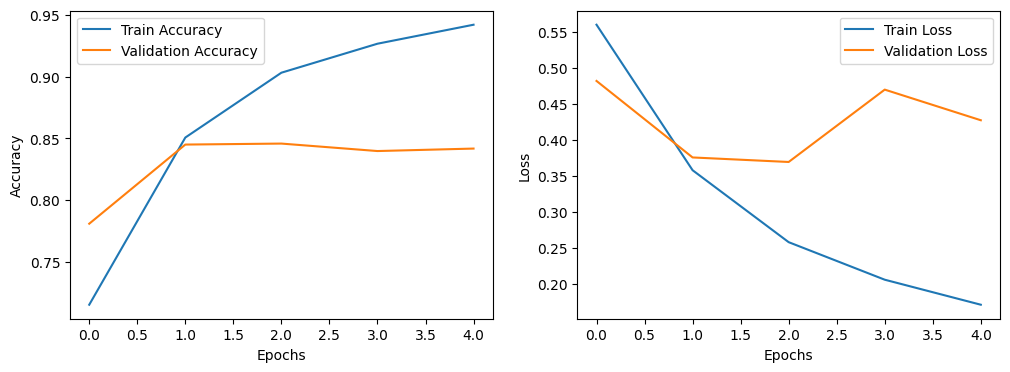

In [ ]:
# Step 5: Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lab 10

## Implement Generative Adversarial Networks to generate realistic Images. Use MNIST, Fashion MNIST or any human face datasets

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize the data to [0, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Add a channel dimension

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Set parameters
BUFFER_SIZE = 60000
BATCH_SIZE = 128
NOISE_DIM = 100
EPOCHS = 5

# Prepare the dataset
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [3]:
# Generator model
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(NOISE_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

In [4]:
# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

In [5]:
# Instantiate generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [7]:
# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Generate and display a sample image
        generate_and_save_images(generator, epoch + 1)

In [8]:
# Function to generate and save images
def generate_and_save_images(model, epoch, num_examples=16):
    noise = tf.random.normal([num_examples, NOISE_DIM])
    generated_images = model(noise, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(num_examples):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.show()

In [9]:
# Train the GAN
train(dataset, EPOCHS)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-97a0fbbbd4d3>", line 2, in <cell line: 0>
    train(dataset, EPOCHS)
  File "<ipython-input-7-c2033d9c7ac8>", line 5, in train
    train_step(image_batch)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 869, in _call
    return tracing_compilation.call_function(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

TypeError: object of type 'NoneType' has no len()